In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('./task4.csv')
X = dataset.values

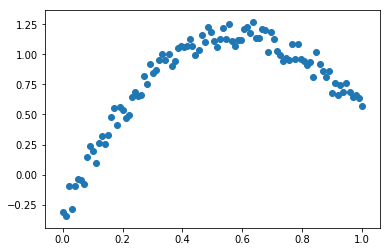

In [3]:
plt.scatter(X[:,0],X[:,1], cmap='seismic')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X[:,0],X[:,1],test_size=0.2, random_state=42)

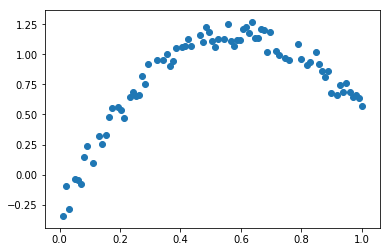

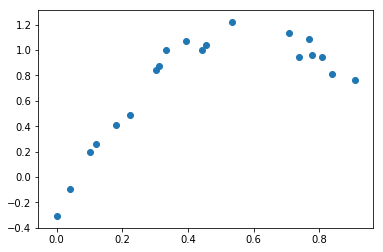

In [5]:
plt.scatter(X_train,y_train, cmap='seismic')
plt.show()
plt.scatter(X_test, y_test, cmap='seismic')
plt.show()


In [6]:
##Thanks to Martin for pointers on how to get my linearRegression working

class MyLinearRegression:
    def fit(self, X, y):
        X = np.c_[np.ones([X.shape[0],1]),X]
        pseudo_inv_matrix = np.linalg.pinv(X)
        weight_matrix = pseudo_inv_matrix.dot(y)
        self.w = weight_matrix
        
    def calculate_error(self, predictions, y):
        se = 0.0
        for i in range(len(y)):
            se+=(predictions[i]-y[i])**2
        if(se!=0.0):
            mse = se/len(y)
        else:
            mse = se
        return mse
    
    def predict(self, X):
        X = np.c_[np.ones([X.shape[0],1]),X]
        return np.matmul(X,self.w)
    
    def plot(self, X, y, title=""):
        plt.scatter(X, y, cmap='seismic')
        predictions = self.predict(X)
        plt.scatter(X, predictions, cmap='seismic')
        plt.title(title)
        plt.show()
        print("mse error")
        print(self.calculate_error(predictions, y))

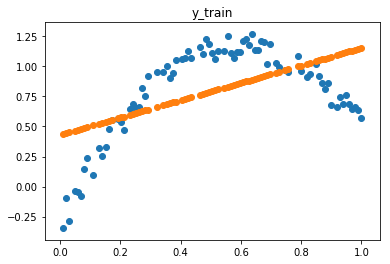

mse error
0.10531853019538022


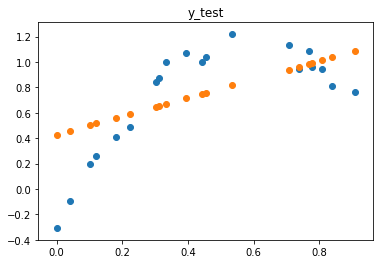

mse error
0.09353840638313979


In [7]:
my_reg = MyLinearRegression()
my_reg.fit(X_train, y_train)
my_reg.plot(X_train, y_train, "y_train")
my_reg.plot(X_test, y_test, "y_test")

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression()
reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
y_test_pred = reg.predict(X_test.reshape(-1, 1))


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


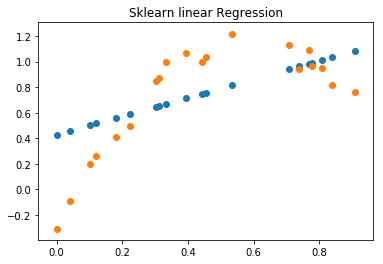

mean squared error
[0.09353841]


In [10]:
plt.title("Sklearn linear Regression")
plt.scatter(X_test,y_test_pred, cmap='seismic')
plt.scatter(X_test,y_test, cmap='seismic')
plt.show()

se = 0.0
for i in range(len(y_test)):
    se+=(y_test_pred[i]-y_test[i])**2
if(se!=0.0):
    mse = se/len(y_test)
else:
    mse = se
print("mean squared error")
print(mse)


As we can see my implementation of the linear regression matches the performance of Sklearns module. I will now introduce the previously defined transformation X * X to make it linearly seperable

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


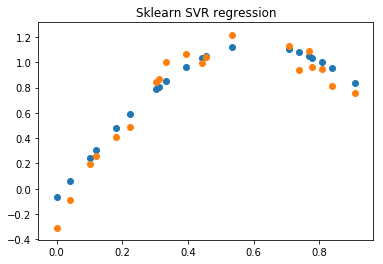

mean squared error
0.010525599796308878


In [11]:
from sklearn.svm import SVR

ridge_reg = SVR(kernel='rbf')
ridge_reg.fit(X_train.reshape(-1, 1), y_train.reshape(-1, 1))
y_test_pred = ridge_reg.predict(X_test.reshape(-1, 1))

plt.title("Sklearn SVR regression")
plt.scatter(X_test,y_test_pred, cmap='seismic')
plt.scatter(X_test,y_test, cmap='seismic')
plt.show()

se = 0.0
for i in range(len(y_test)):
    se+=(y_test_pred[i]-y_test[i])**2
if(se!=0.0):
    mse = se/len(y_test)
else:
    mse = se
print("mean squared error")
print(mse)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


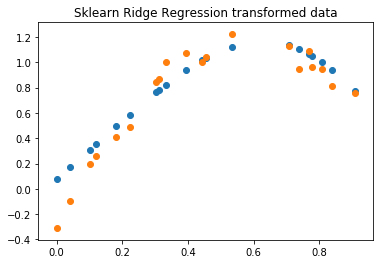

mean squared error
0.01921236310371929


In [12]:
X2_train = np.array(list((zip(X_train, X_train * X_train))))
X2_test = np.array(list((zip(X_test, X_test * X_test))))

ridge_reg = SVR(kernel='rbf')
ridge_reg.fit(X2_train, y_train.reshape(-1, 1))
y_test_pred = ridge_reg.predict(X2_test)

plt.title("Sklearn Ridge Regression transformed data")
plt.scatter(X2_test[:,0],y_test_pred, cmap='seismic')
plt.scatter(X2_test[:,0],y_test, cmap='seismic')
plt.show()

se = 0.0
for i in range(len(y_test)):
    se+=(y_test_pred[i]-y_test[i])**2
if(se!=0.0):
    mse = se/len(y_test)
else:
    mse = se
print("mean squared error")
print(mse)

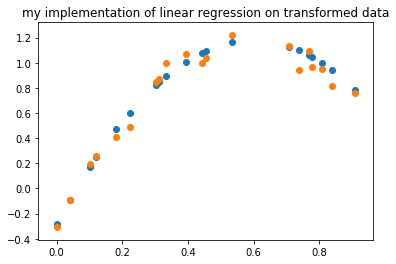

mean squared error
0.004870265424297508


In [13]:
my_reg = MyLinearRegression()
my_reg.fit(X2_train, y_train)
y_test_pred = my_reg.predict(X2_test)

plt.title("my implementation of linear regression on transformed data")
plt.scatter(X2_test[:,0],y_test_pred, cmap='seismic')
plt.scatter(X2_test[:,0],y_test, cmap='seismic')
plt.show()

se = 0.0
for i in range(len(y_test)):
    se+=(y_test_pred[i]-y_test[i])**2
if(se!=0.0):
    mse = se/len(y_test)
else:
    mse = se
print("mean squared error")
print(mse)

New feature improves performance on both inbuilt linear regression and my implementation but appears to cause a reduction in performance for SVR.